# Project Tasks

### Test 1: Play each sound and record human matching

In [1]:
import numpy as np
from glob import glob
from pathlib import Path
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.signal import stft
from processing import feature_extraction, visualize_mfccs
from codebook import Codebook

In [2]:

data_folder = Path().resolve() / "Audio Files"

given_test_files = glob(f'{data_folder}\Given Test\*.wav')
given_train_files = glob(f'{data_folder}\Given Train\*.wav')

#### Given Training 

In [3]:
given_train_arrays = []
for file_path in given_train_files:
    sample_rate, audio_data = wavfile.read(file_path)
    given_train_arrays.append(np.array(audio_data))
print(f"Number of audio files: {len(given_train_arrays)}")

Number of audio files: 11


In [5]:
recording_num = 0
Audio(given_train_arrays[recording_num], rate=sample_rate)

#### Given Testing 

In [12]:
given_test_arrays = []
for file_path in given_test_files:
    try:
        sample_rate, audio_data = wavfile.read(file_path)
        given_test_arrays.append(np.array(audio_data))
    except:
        print(f"Error in file: ",file_path)
print(f"Number of audio files: {len(given_test_arrays)}")

Error in file:  C:\Users\Conor King\Documents\School\201\Speaker-Recognition\Audio Files\Given Test\s8.wav
Number of audio files: 7


In [11]:
recording_num = 6
Audio(given_test_arrays[recording_num], rate=sample_rate)

### Test 2: Play a sound, plot, and answer how long is 256 samples in time.

Sample rate: 12500
Milliseconds in 256 samples: 20.48


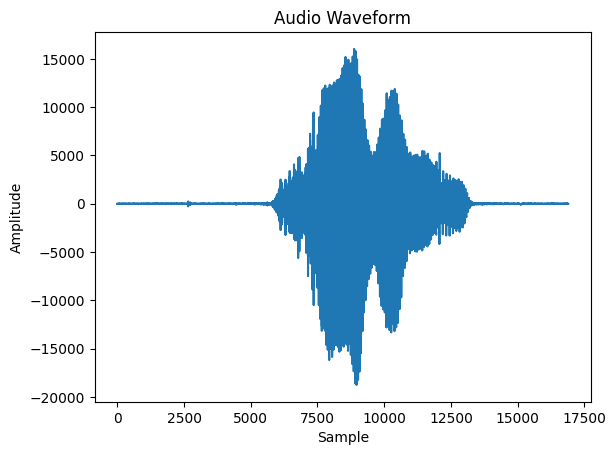

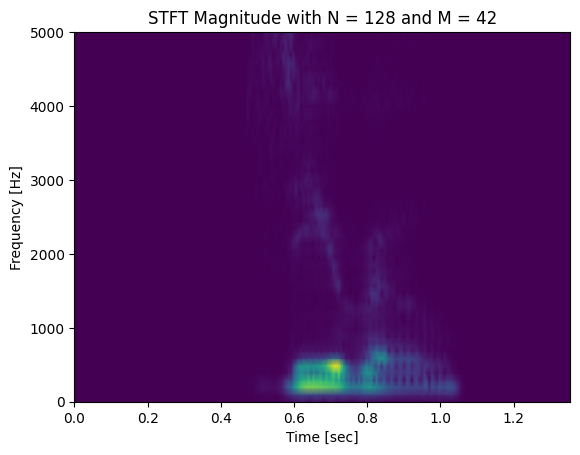

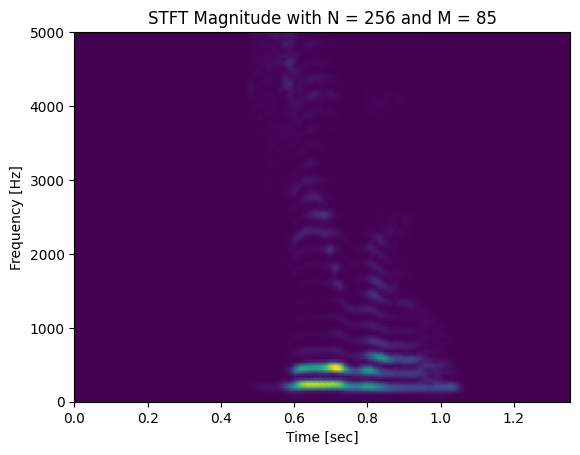

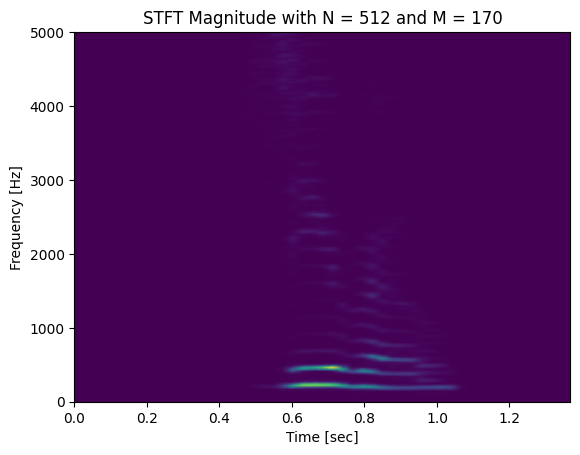

In [14]:
arrays = {
    'given_train': given_train_arrays,
    'given_test': given_test_arrays
}

chosen_array = 'given_test'
chosen_sample = 5

currentData = arrays[chosen_array][chosen_sample]

print(f"Sample rate: {sample_rate}")
numSamples = 256
mseconds = numSamples/sample_rate * 1000
print(f"Milliseconds in 256 samples: {mseconds}")

plt.plot(currentData)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

# STFT
frame_sizes = [128, 256, 512]
for N in frame_sizes:
    M = N // 3
    f, t, Zxx = stft(currentData, fs=sample_rate, nperseg=N, noverlap=M)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(f'STFT Magnitude with N = {N} and M = {M}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0, 5000)
    plt.show()

### Test 3: Mel Spectrum

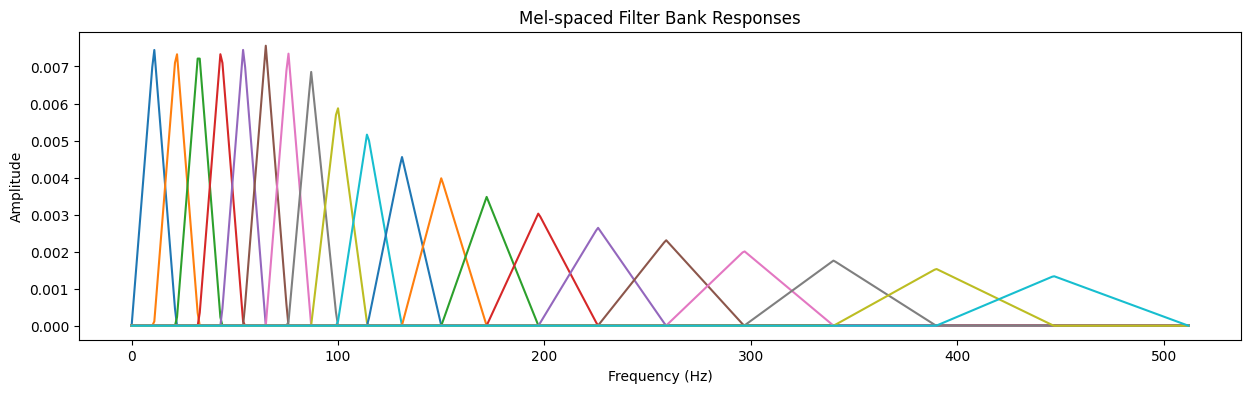

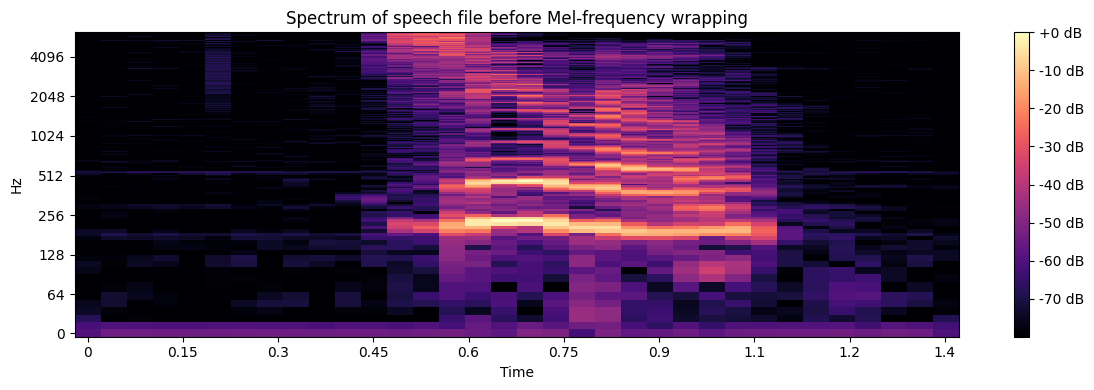

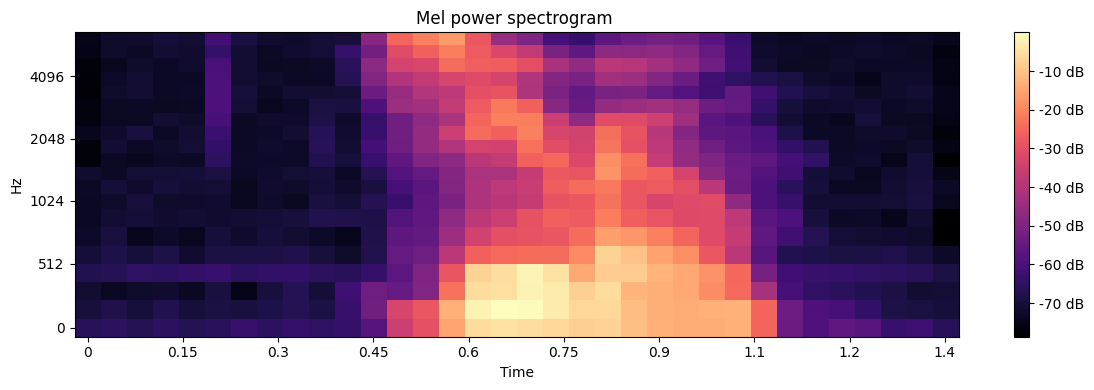

In [15]:
from librosa.feature import mfcc, melspectrogram 
from librosa.filters import mel
from librosa.core import power_to_db
import librosa.display

N = 1024
M = 512
K = 20

currentData = currentData.astype(np.float32)

# Create the filter bank
mel_filter_bank = librosa.filters.mel(sr=sample_rate, n_fft=N, n_mels=K)

# Plot the filter bank
plt.figure(figsize=(15, 4))
for i in range(K):
    plt.plot(mel_filter_bank[i])
plt.title('Mel-spaced Filter Bank Responses')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

frequencies, times, Zxx = stft(currentData, fs=sample_rate, nperseg=N, noverlap=M)

D_log = librosa.amplitude_to_db(np.abs(Zxx), ref=np.max)

# Plot the spectrum
plt.figure(figsize=(12, 4))
librosa.display.specshow(D_log, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrum of speech file before Mel-frequency wrapping')
plt.tight_layout()
plt.show()

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=currentData, sr=sample_rate, n_fft=N, hop_length=M, n_mels=K)


# Convert to log scale (dB).
log_S = librosa.core.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))

librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')

#formatting
plt.title('Mel power spectrogram ')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()
plt.show()


### Test 4: Cepstrum

feature_extraction function in processing.py

### Test 5 and 6: Acoustic Space and Centroid Plotting

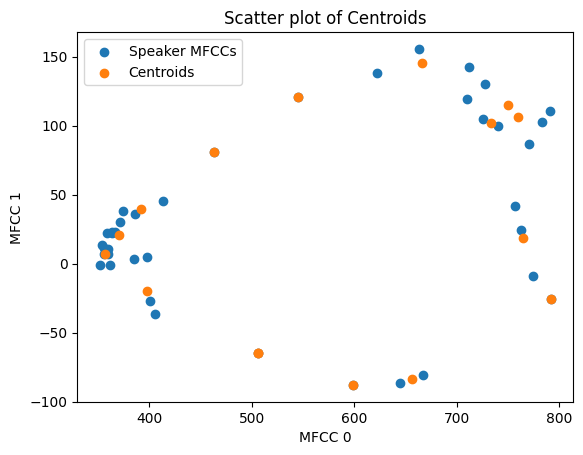

In [19]:
N = 1024
M = 409
n_mfcc = 40
size_codebook = 16

x_MFCC = 0
y_MFCC = 1

speaker_mfccs = feature_extraction(audio=currentData, N = N,M=M,sampling_rate=sample_rate,n_mfcc=n_mfcc)

ax = visualize_mfccs(mfcc_features=speaker_mfccs,mfcc_x=x_MFCC,mfcc_y=y_MFCC)

currentCodebook = Codebook(speaker_mfccs, size_codebook=size_codebook)

currentCodebook.plot_codebook(x_MFCC,y_MFCC,ax)

ax.legend()
plt.show()

# Test 7: Recognition Rate 1

In [ ]:
twelve_test_files = glob(f'{data_folder}\Twelve Test\*.wav')
twelve_train_files = glob(f'{data_folder}\Twelve Train\*.wav')
zero_test_files = glob(f'{data_folder}\Zero Test\*.wav')
zero_train_files = glob(f'{data_folder}\Zero Train\*.wav')

zero_train_arrays = []
for file_path in zero_train_files:
    sample_rate, audio_data = wavfile.read(file_path)
    zero_train_arrays.append(np.array(audio_data))



# Later Tests (Storage for now)

In [ ]:
twelve_train_arrays = []
for file_path in twelve_train_files:
    sample_rate, audio_data = wavfile.read(file_path)
    twelve_train_arrays.append(np.array(audio_data))
print(f"Number of audio files: {len(twelve_train_arrays)}")

twelve_test_arrays = []
for file_path in twelve_test_files:
    sample_rate, audio_data = wavfile.read(file_path)
    twelve_test_arrays.append(np.array(audio_data))
print(f"Number of audio files: {len(twelve_test_arrays)}")